# 目录
- 代码准备


- [四种 6bp promoter pattern 基因 NAA组 vs IAA组 logFC 均值分布 对比](#四种-6bp-promoter-pattern-基因-NAA组-vs-IAA组-logFC-均值分布-对比)


- [IAA / GH3 / LBD / SAUR 基因家族 NAA组 vs IAA组 logFC均值分布 对比](#IAA-/-GH3-/-LBD-/-SAUR-基因家族-NAA组-vs-IAA组-logFC均值分布-对比)
  - [all_regulated 主集团下方有一片 outliners, 但上方没有，可以切出来看看](#all_regulated-主集团下方有一片-outliners,-但上方没有，可以切出来看看)


- [几种 Composite Auxin Responsive Elements 基因 NAA组 vs IAA组 logFC 均值分布 对比](#几种-Composite-Auxin-Responsive-Elements-基因-NAA组-vs-IAA组-logFC-均值分布-对比)

In [1]:
%matplotlib inline

import os
import csv, json
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
df = pd.read_table('integrated.tsv', sep='\t')

In [3]:
NAA_GSEs = ['GSE3350', 'GSE3350(1', 'GSE3350(2', 'GSE42896']
IAA_GSEs = ['GSE35580', 'GSE35580(1', 'GSE35580(2', 'GSE35580(3', 'GSE35580(4', 'GSE7432', 'GSE71737']
# auxin concentration: High -> Low

In [4]:
# perform t-test on each row
df['t-statistic'] = None
df['p-value'] = None
for i in range(len(df)):
    df.loc[i, 't-statistic'], df.loc[i, 'p-value'] = stats.ttest_ind(df.iloc[i][NAA_GSEs], df.iloc[i][IAA_GSEs])

KeyboardInterrupt: 

In [5]:
#calculate the difference of mean
##df['NAA-IAA'] = None
df['NAA_mean'] = None
df['IAA_mean'] = None
for i in range(len(df)):
    df.loc[i, 'NAA_mean'] = sum(df.iloc[i][NAA_GSEs]) / len(df.iloc[i][NAA_GSEs])
    df.loc[i, 'IAA_mean'] = sum(df.iloc[i][IAA_GSEs]) / len(df.iloc[i][IAA_GSEs])
df['NAA-IAA'] = df['NAA_mean'] - df['IAA_mean']
#    df['NAA-IAA'][i] = sum(df.iloc[i][NAA_GSEs]) / len(df.iloc[i][NAA_GSEs]) - sum(df.iloc[i][IAA_GSEs]) / len(df.iloc[i][IAA_GSEs])

In [39]:
df.to_csv('integrated.tsv', sep='\t')

In [4]:
# 通过启动子元件、基因家族等对包含基因进行分类，according to TAIR 10 description
with open('slice_json.JSON') as slice_json:
    slice_dict = json.load(slice_json)

In [5]:
TGTCTC = slice_dict['6bp_promoter_pattern']['TGTCTC']
TGTCAC = slice_dict['6bp_promoter_pattern']['TGTCAC']
TGTCCC = slice_dict['6bp_promoter_pattern']['TGTCCC']
TGTCNC = slice_dict['6bp_promoter_pattern']['TGTCNC']

IAA = slice_dict['family']['IAA']
GH3 = slice_dict['family']['GH3']
LBD = slice_dict['family']['LBD']
SAUR = slice_dict['family']['SAUR']
all_regulated = slice_dict['family']['all_regulated']

In [6]:
# violinplot 自用配置函数
counter = 1
def violin(data, figsize=(12,10), style=u'seaborn', filename=False):
    global counter
    plt.style.use(style)
    fig = plt.figure(counter, figsize)
    ax = fig.add_subplot(111)
    #ax.yaxis.grid(True)
    plot_object = ax.violinplot(data, showmeans=False, showmedians=True, showextrema=True)
    if filename:
        fig.savefig(filename)
    counter += 1
    #return plot_object

In [7]:
def splited_violinplot(dataf, x, order=None, bw=.2, figsize=(8,7)):
    df_copy = dataf.copy()
    l = len(df_copy)
    df_copy['logFC_mean'] = 0
    df_copy['hue'] = 'Null'
    df_copy = pd.concat([df_copy, df_copy], ignore_index=True)
    for i in range(l):
        df_copy.loc[i, 'logFC_mean'] = df_copy.loc[i, 'IAA_mean']
        df_copy.loc[i, 'hue'] = 'IAA'
        df_copy.loc[i+l, 'logFC_mean'] = df_copy.loc[i, 'NAA_mean']
        df_copy.loc[i+l, 'hue'] = 'NAA'
    plt.figure(figsize=figsize)
    if order is None:
        return sns.violinplot(x=x, y='logFC_mean', hue='hue', data=df_copy, split=True, bw=bw)
    return sns.violinplot(x=x, y='logFC_mean', hue='hue', data=df_copy, split=True, order=order, bw=bw)

In [15]:
df = pd.read_table('integrated.tsv', sep='\t')

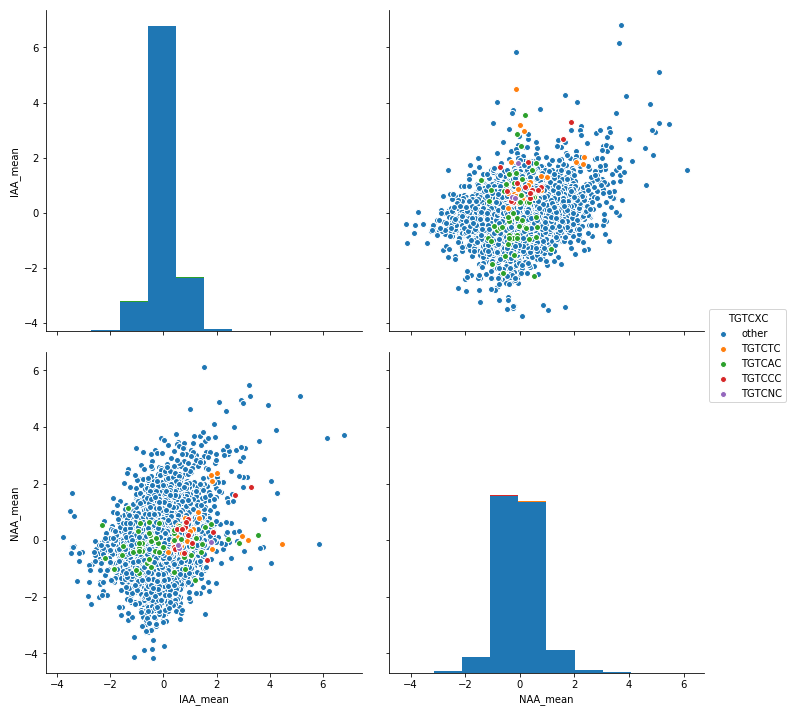

In [9]:
sns.pairplot(df[['IAA_mean', 'NAA_mean', 'TGTCXC']], hue='TGTCXC', size=5)
# other 把图铺满了……要不得
# PS: other 明显贴合对角线趋势

---

## 四种 6bp promoter pattern 基因 NAA组 vs IAA组 logFC 均值分布 对比

In [8]:
AuxRE_sliced = [list(df[df['Probe Set ID'].isin(TGTCTC)]['NAA-IAA']), 
                list(df[df['Probe Set ID'].isin(TGTCAC)]['NAA-IAA']), 
                list(df[df['Probe Set ID'].isin(TGTCCC)]['NAA-IAA']), 
                list(df[df['Probe Set ID'].isin(TGTCNC)]['NAA-IAA']),
                list(df[df['Probe Set ID'].isin(TGTCTC+TGTCAC+TGTCCC+TGTCNC)]['NAA-IAA'])]

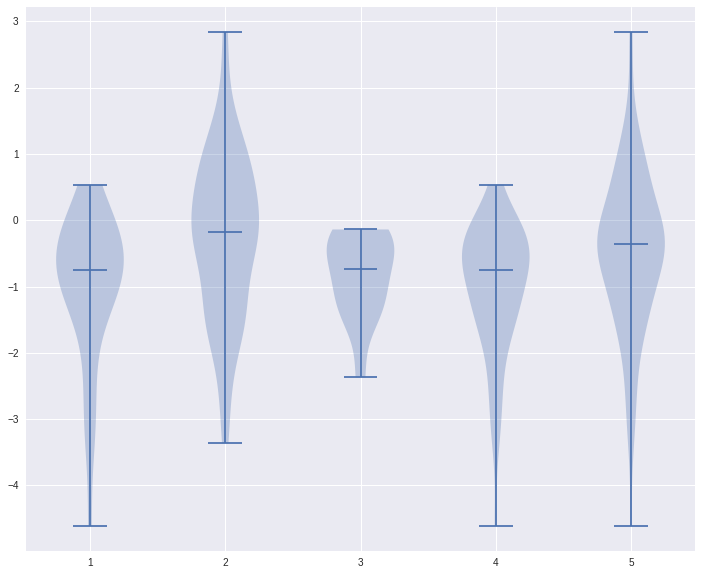

In [11]:
violin(AuxRE_sliced)

#### !!!!!

In [9]:
df['TGTCXC'] = 'other'
df.loc[df['Probe Set ID'].isin(TGTCNC), 'TGTCXC'] = 'TGTCNC'
df.loc[df['Probe Set ID'].isin(TGTCTC), 'TGTCXC'] = 'TGTCTC'
df.loc[df['Probe Set ID'].isin(TGTCAC), 'TGTCXC'] = 'TGTCAC'
df.loc[df['Probe Set ID'].isin(TGTCCC), 'TGTCXC'] = 'TGTCCC'

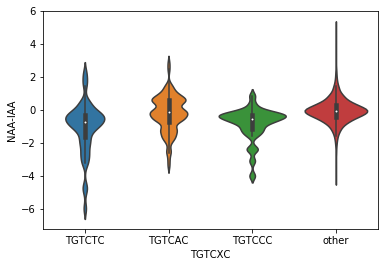

In [10]:
sns.violinplot(x='TGTCXC', y='NAA-IAA', data=df, order=['TGTCTC', 'TGTCAC', 'TGTCCC', 'other'], bw=.2)

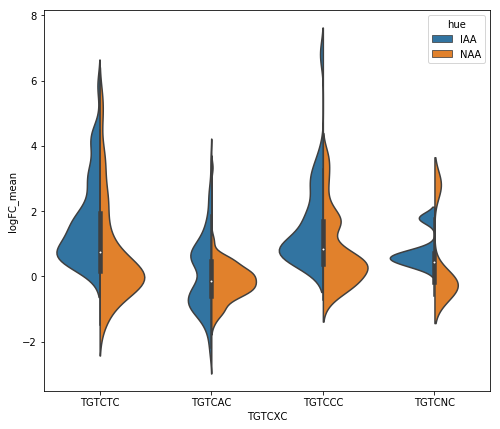

In [11]:
splited_violinplot(df, 'TGTCXC', order=['TGTCTC', 'TGTCAC', 'TGTCCC', 'TGTCNC'], bw=.3)
# TGTCNC 包括了 TGTCTC, TGTCCC 的全部加上 TGTCAC 的一部分，还有自己专属的三个点，什么意思啊 （这儿画出来就是那三个点

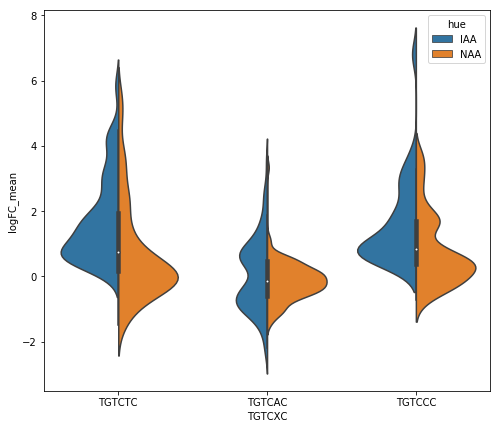

In [12]:
splited_violinplot(df, 'TGTCXC', order=['TGTCTC', 'TGTCAC', 'TGTCCC'], bw=.3)

#### 四种 6bp promoter pattern 基因们 在 NAA 处理时都基本好好待在 0 附近呀

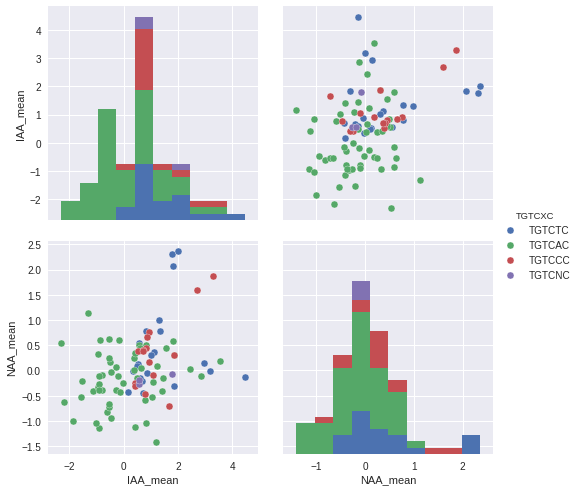

In [19]:
sns.pairplot(df[df['Probe Set ID'].isin(TGTCTC+TGTCAC+TGTCCC+TGTCNC)][['IAA_mean', 'NAA_mean', 'TGTCXC']], hue='TGTCXC', size=3.5)
# PairGrid

#### to describe

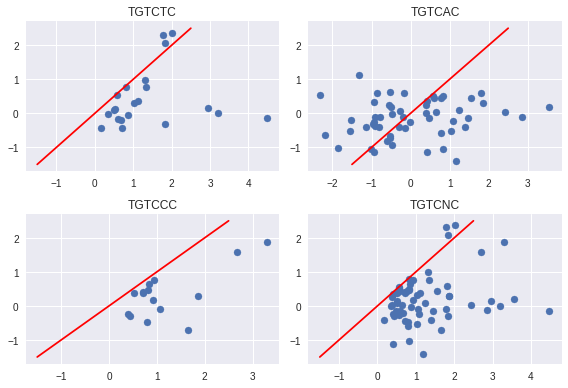

In [20]:
plt.style.use(u'seaborn')
fig = plt.figure(1)#, figsize)
p1 = plt.subplot(221); p2 = plt.subplot(222); p3 = plt.subplot(223); p4 = plt.subplot(224)
p1.scatter(x='IAA_mean', y='NAA_mean', data=df[df['TGTCXC']=='TGTCTC'])
p2.scatter(x='IAA_mean', y='NAA_mean', data=df[df['TGTCXC']=='TGTCAC'])
p3.scatter(x='IAA_mean', y='NAA_mean', data=df[df['TGTCXC']=='TGTCCC'])
p4.scatter(x='IAA_mean', y='NAA_mean', data=df[df['Probe Set ID'].isin(TGTCNC)])
for p, slicer in zip([p1, p2, p3, p4], ['TGTCTC', 'TGTCAC', 'TGTCCC', 'TGTCNC']):
    p.plot([-1.5,2.5], [-1.5,2.5], 'r')
    p.set_title(slicer)
fig.tight_layout()

#### TGTCAC 组无论 IAA 组如何变化，NAA 组始终在 0 附近，TGTCTC 组部分贴合对角线，部分与前述 TGTCAC 组相同，TGTCCC 则普遍略低于对角线

---

## IAA / GH3 / LBD / SAUR 基因家族 NAA组 vs IAA组 logFC均值分布 对比

In [34]:
df['family'] = 'other'
df.loc[df['Probe Set ID'].isin(all_regulated), 'family'] = 'all_regulated'
df.loc[df['Probe Set ID'].isin(IAA), 'family'] = 'IAA'
df.loc[df['Probe Set ID'].isin(GH3), 'family'] = 'GH3'
df.loc[df['Probe Set ID'].isin(LBD), 'family'] = 'LBD'
df.loc[df['Probe Set ID'].isin(SAUR), 'family'] = 'SAUR'

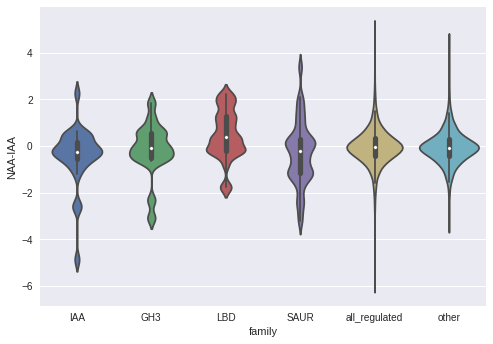

In [35]:
sns.violinplot(x='family', y='NAA-IAA', data=df, order=['IAA', 'GH3', 'LBD', 'SAUR', 'all_regulated', 'other'], bw=.2)
#可以把 0 那条线突出强调一下

#### 普遍没啥差别？？？LBD 还变高了？？？

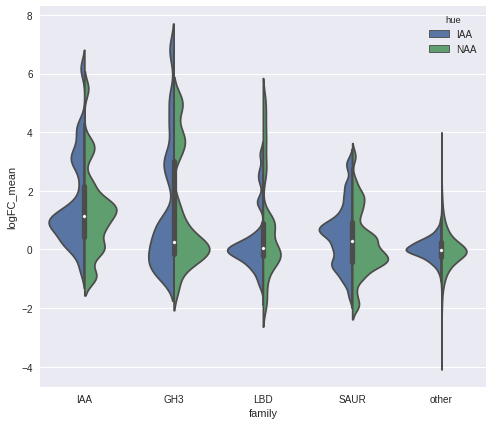

In [36]:
splited_violinplot(df, 'family', order=['IAA', 'GH3', 'LBD', 'SAUR', 'other'])

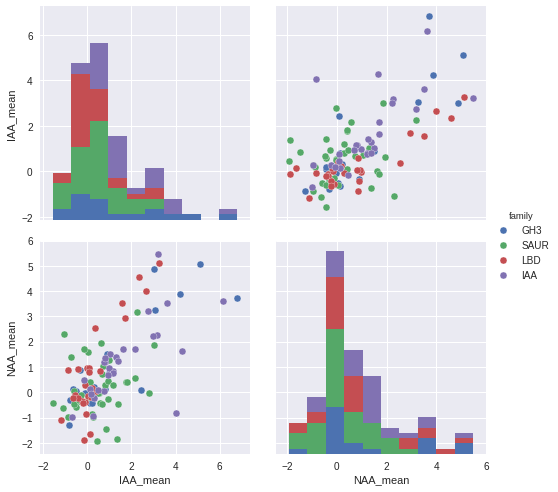

In [37]:
sns.pairplot(df[df['family'].isin(['IAA', 'GH3', 'LBD', 'SAUR'])][['IAA_mean', 'NAA_mean', 'family']], hue='family', size=3.5)

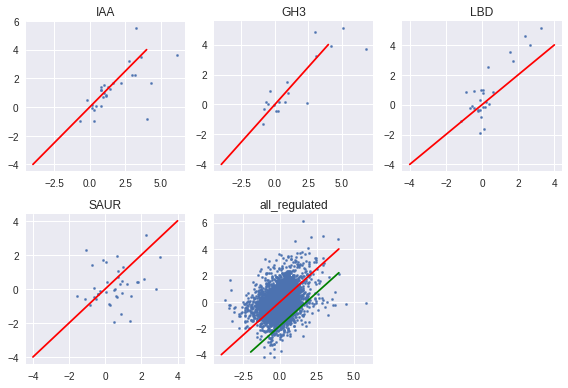

In [38]:
plt.style.use(u'seaborn')
fig = plt.figure(1)#, figsize=(10,9))
subplots = [plt.subplot(2, 3, 1+i) for i in range(5)]
for i, slicer in zip(range(5), ['IAA', 'GH3', 'LBD', 'SAUR', 'all_regulated']):
    subplots[i].scatter(x='IAA_mean', y='NAA_mean', data=df[df['family']==slicer], s=5)
    subplots[i].plot([-4,4], [-4,4], 'r')
    subplots[i].set_title(slicer)
subplots[4].plot([-2,4], [-3.8,2.2], 'g')
fig.tight_layout()

to describe

In [26]:
df[df['IAA_mean'] - df['NAA_mean'] >= 1.3].to_csv('temp.tsv', sep='\t')

to describe

---

## [几种 Composite Auxin Responsive Elements 基因](https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-15-S12-S4#Sec17) NAA组 vs IAA组 logFC 均值分布 对比

In [27]:
AuxRE = pd.read_table('Composite AuxREs with ArrayID.tsv')

In [28]:
composite_AuxRE_sliced = [list(df[df['Probe Set ID'].isin(AuxRE[AuxRE[re] > 0]['ID'])]['NAA-IAA']) for re in list(AuxRE.columns)[2:-5]]

In [29]:
composite_AuxRE_sliced

[[0.38767721071400002,
  -0.8753972810709999,
  -0.64271973464300003,
  -0.30428150107099999,
  0.045065672857099996,
  -0.28607009535700001,
  -0.11249183785700001,
  -0.71125816678599996,
  -0.276461783929,
  0.48830492357100003,
  0.22097739107099998,
  0.098041120357100012,
  -0.14327037464299999,
  0.0328892053571,
  -0.15443500857100001,
  0.28836877678599998,
  0.0087554857142900008,
  -1.7149421110699998,
  0.083751380714300008,
  -0.28270842285699999,
  0.29139000250000002,
  0.28152220678599998,
  0.65679343107100008,
  -0.994375688571,
  -0.012819795357099999,
  -1.80410053393,
  -0.74366437642900007,
  -0.201246541429,
  -0.73346299535699988,
  0.4568388625,
  0.69667077464300009,
  0.18160960357099998,
  -0.31198675035700002,
  0.040798266071399997,
  1.0800792428599999,
  0.41382150428600001,
  -0.203903936786,
  0.48295923642899996,
  -0.29584500857099999,
  0.19675253464299999,
  -0.84969755642900002,
  0.35744913535700001,
  -0.048292798214300006,
  0.413836184286,
  0

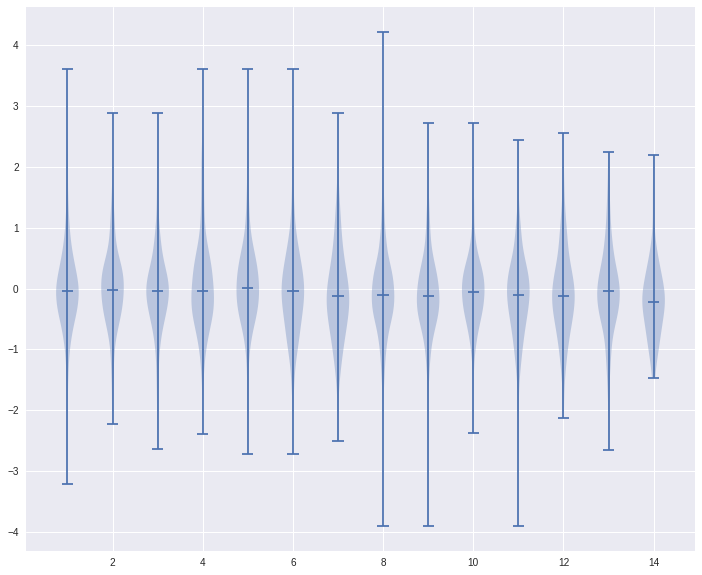

In [30]:
violin(composite_AuxRE_sliced)

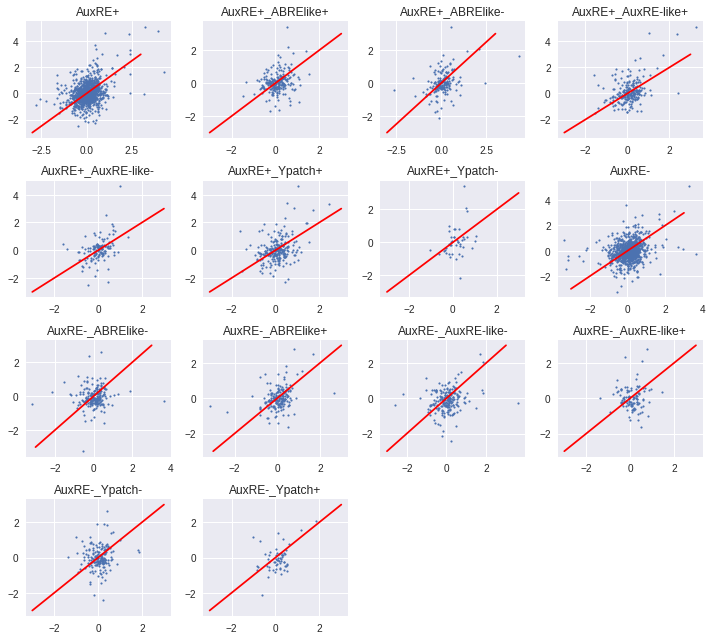

In [31]:
plt.style.use(u'seaborn')
fig = plt.figure(2, figsize=(10,9))
subplots = [plt.subplot(4, 4, 1+i) for i in range(14)]
for i, slicer in zip(range(14), list(AuxRE.columns)[2:-5]):
    subplots[i].scatter(x='IAA_mean', y='NAA_mean', data=df[df['Probe Set ID'].isin(list(AuxRE[AuxRE[slicer] > 0]['ID']))], s=3)
    subplots[i].plot([-3,3], [-3,3], 'r')
    subplots[i].set_title(slicer)
fig.tight_layout()

In [32]:
df[df['Probe Set ID'].isin(all_regulated)][['Probe Set ID'] + NAA_GSEs + IAA_GSEs].to_csv('toR.tsv', sep='\t')